# Visualizing Convolutional Filters Output

In [1]:
from tensorflow.keras.applications.vgg16 import VGG16

VGG_model = VGG16(weights='imagenet', include_top=False, input_shape=(125,125,3))

**Load an image and preprocess it**

In [2]:
#from tensorflow.keras.preprocessing.image import load_img, img_to_array
from skimage import io
from PIL import Image
import numpy as np
from tensorflow.keras.applications.vgg16 import preprocess_input

img_path="all_images/cancerous/UID_1_2_1_all.bmp"

image = io.imread(img_path)
image = Image.fromarray(image, 'RGB')
image = image.resize((125,125))
image = np.array(image)

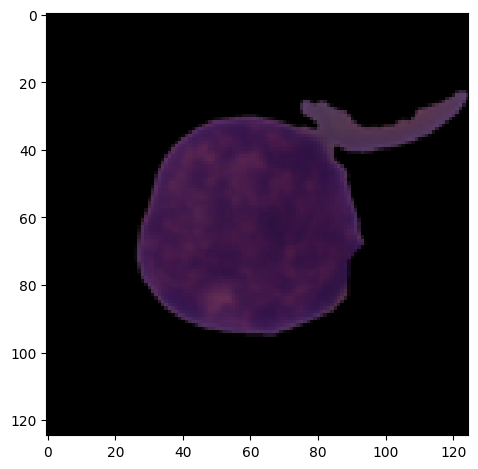

In [3]:
io.imshow(image)

In [4]:
#expand so it meets the model input layer shape requirements
# n*x*y*3(channels)
img_preprocessed = preprocess_input(image)
img_preprocessed = np.expand_dims(img_preprocessed, axis=0)

**Extract features using pretrained model**

In [5]:
#generate feautre output by predicting an input image
features = VGG_model.predict(img_preprocessed)

1/1 [==============================] - 0s 481ms/step


In [6]:
features.shape

(1, 3, 3, 512)

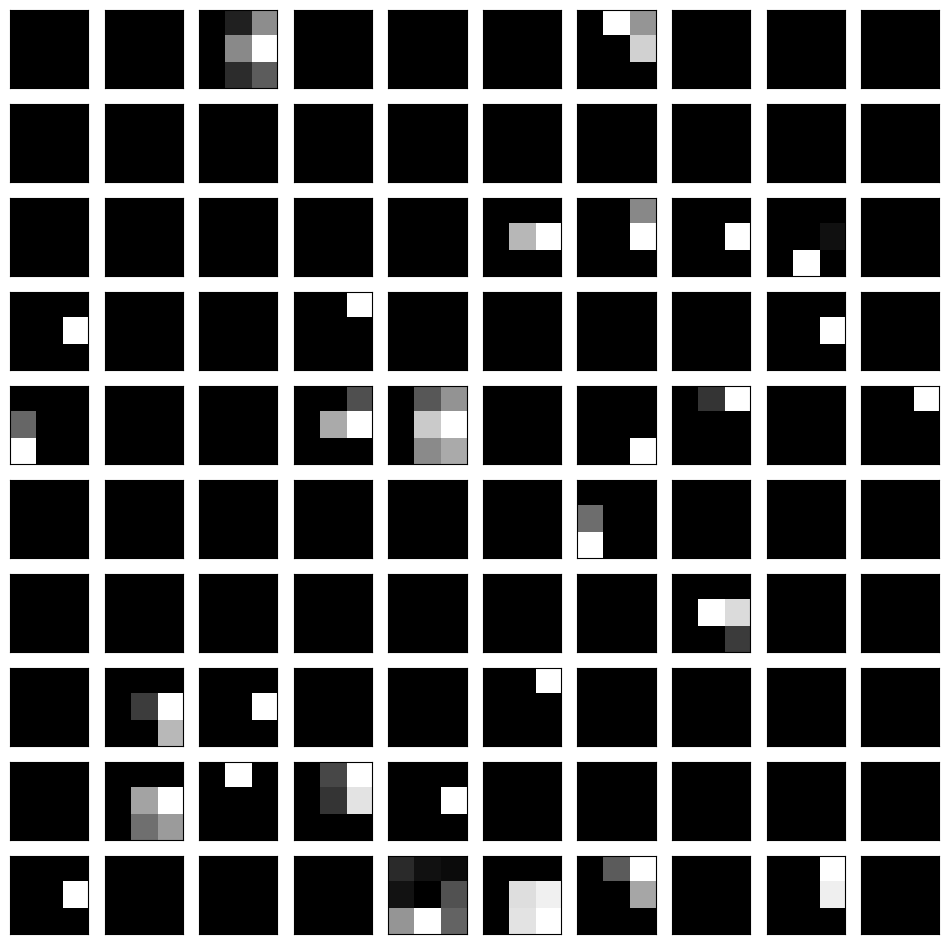

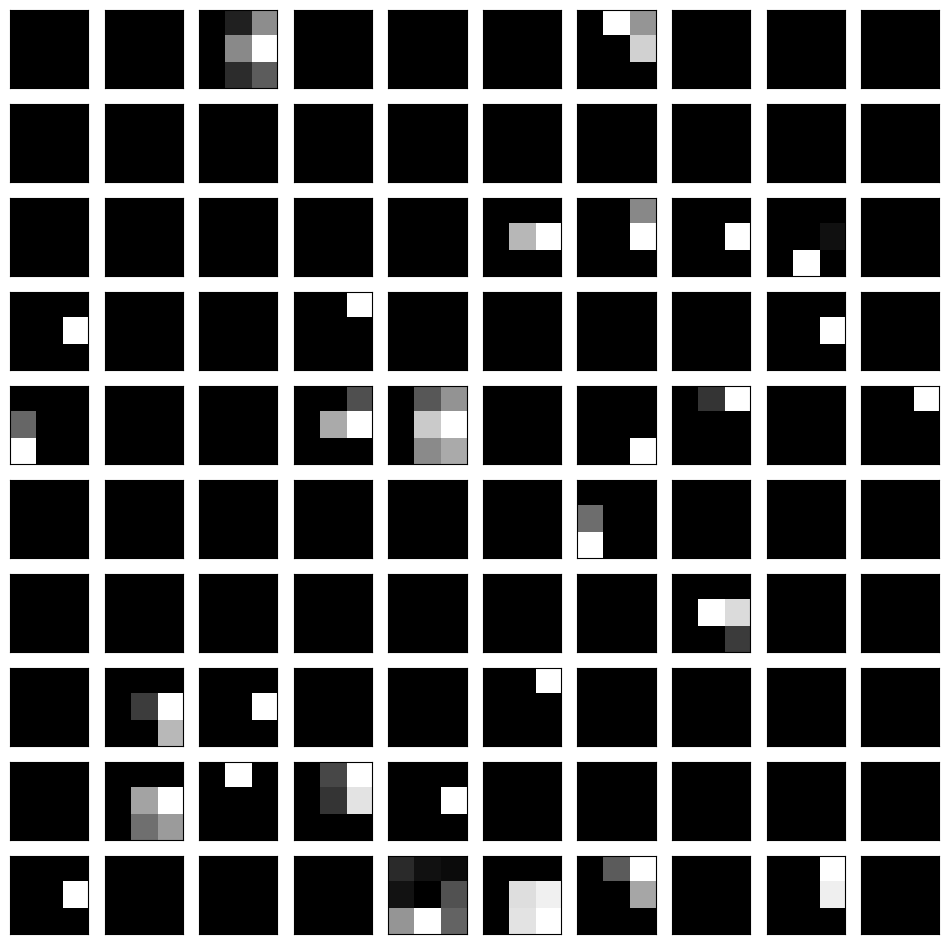

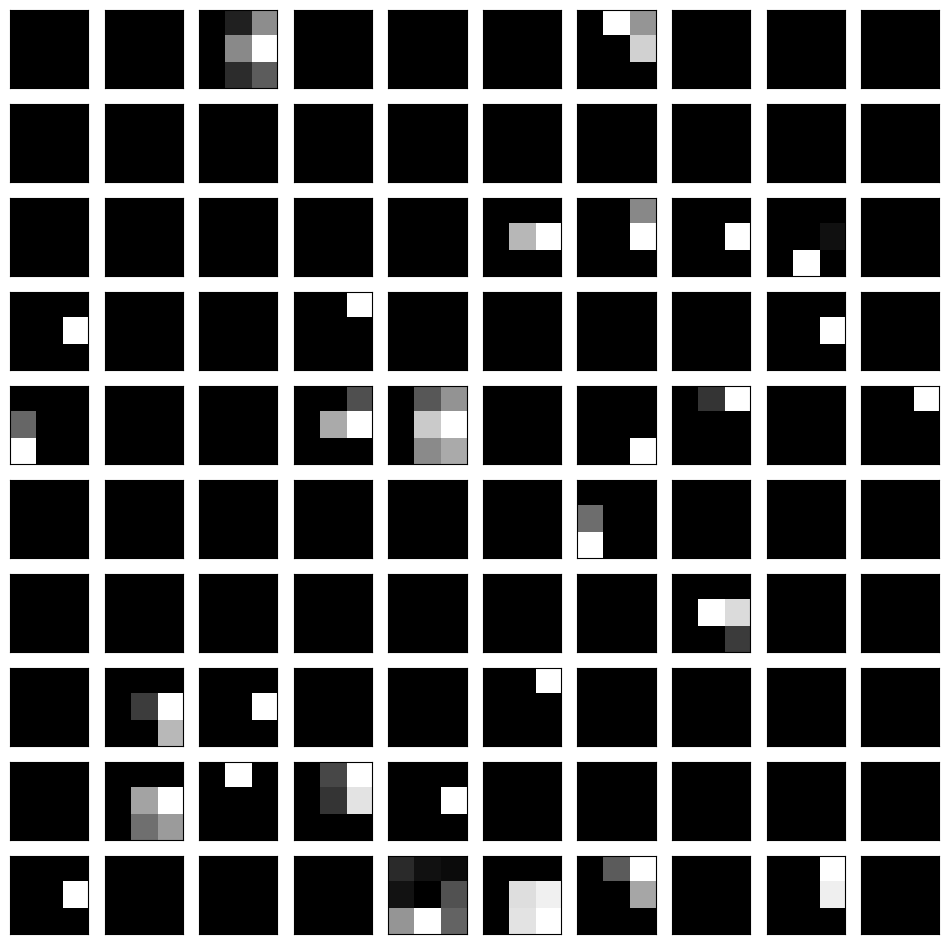

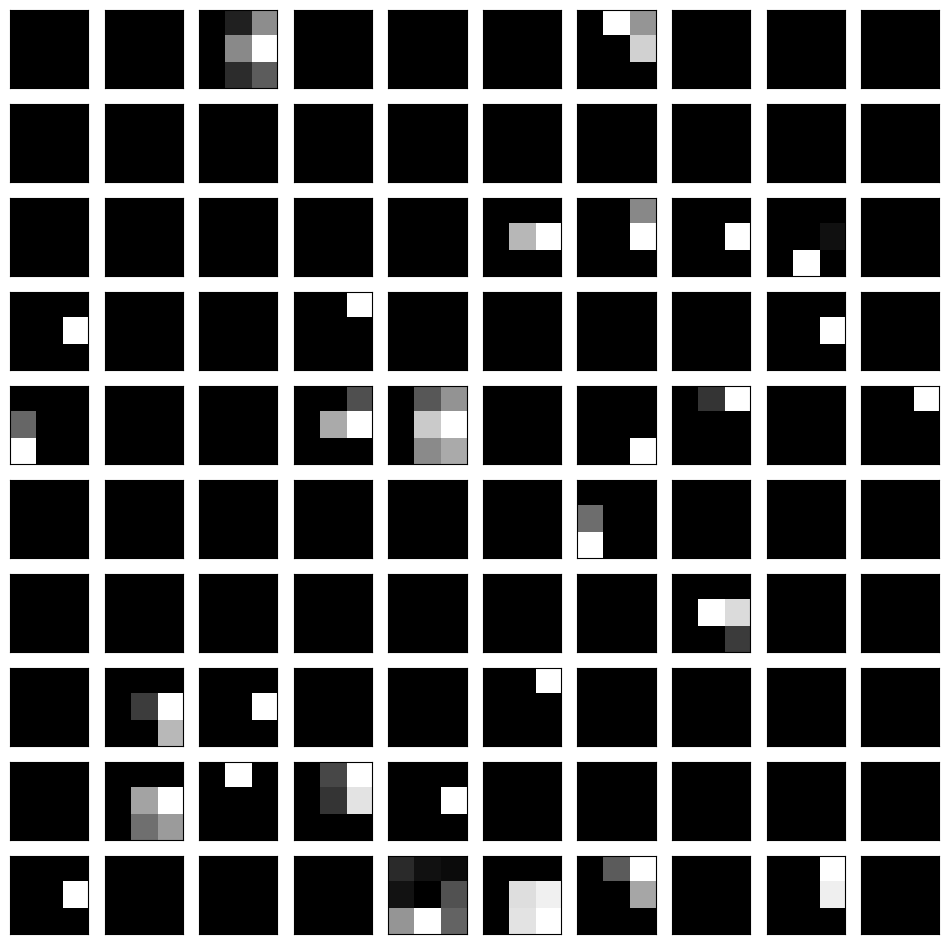

In [7]:
import matplotlib.pyplot as plt

columns = 10
rows = 10

for j in range(1,5):
    fig = plt.figure(figsize=(12,12))
    for i in range(1, columns*rows+1):
        fig = plt.subplot(rows, columns, i)
        fig.set_xticks([])
        fig.set_yticks([])
        plt.imshow(features[0, :, :, i-1], cmap='gray')  
    plt.show()

In [ ]:
3*3*512